<h1>SVM - Support Vector Machine</h1>

Support Vector Machine is one of the most popular models in Machine Learning. Its popularity stems from the fact that it can be used for <i>linear or nonlinear classification</i> and <i>regression</i> as well. 

<h3>When to use it?</h3> With complex but small or medium size datasets.

<h3>How it works?</h3>
<img src="svm.png"></img><br>
Sometimes, although our classes are linearly separable, methods like Linear Regression may not work properly.
SVM classifier not only separates the classes, but also stays as far away from the closest training instances as possible.<br><br>
The space divided by the SVM's line is called <b>Large Margin Classifier</b>:
in general the larger the margin the lower the generalization error of the classifier.

The instances located on the edge of this space are called <b>Support Vectors</b>.

Notes:
- 2 techniques: hard margin, soft margin (the last one is the most used, because more flexible)
- SVM is sensible to scaling

Let's see an example of <b>LinearSVC</b>:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris Virginica

svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
))

svm_clf.fit(X, y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))))

<h3>About C and Hinge</h3>

<p>C ==> hyperparameter that allows us to find a good balance between having a "street" as large as possible and limiting the margin violations:
smaller C ==> wider street | more margin violations</p>

<p>Hinge loss function ==> <i>max(0, 1-t)</i></p>
- green: square loss function
- purple: hinge loss function
- yellow: logistic loss function
- blue: 0–1 indicator function
<img src="loss_functions.png"></img>

<h1>Nonlinear SVC</h1>

<p>One way to handle nonlinear dataset consists of adding more features, such as polynomial features. However, when you have to work on a large dataset you probably need a high polynomial degree, therefore a huge number of feature, and this can make the model too slow.</p>

<p>The solution is the <b>Kernel Trick</b> technique.</p>

Without goind into details, it allows to obtain the same result of adding polynomial features without actually add them! Magic?
You can check this magic here: https://en.wikipedia.org/wiki/Kernel_method

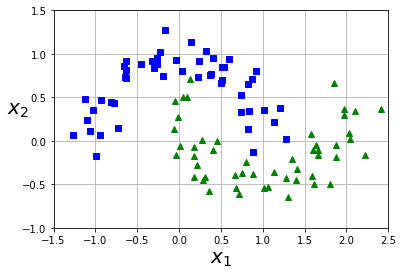

In [3]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [4]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))))

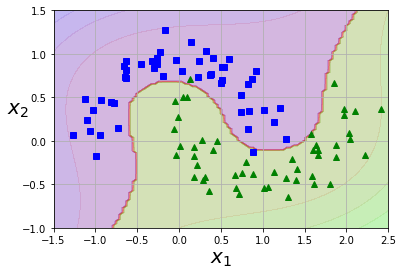

In [5]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

<p>Another method to solve the previous issue consists of using a <i>similarity function</i>, such as the <b>Gaussian Radial Basis Function (RBF)</b>.</p>

Reference here ==> https://en.wikipedia.org/wiki/Radial_basis_function

<p>Of course, we could have the same problem we had with the polynomial features, but once again the kernel trick comes to our aid:</p>

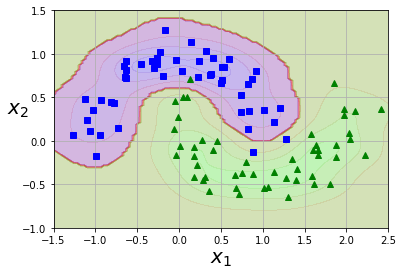

In [6]:
rbf_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
))
rbf_kernel_svm_clf.fit(X, y)

plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()